## Info

diners dilemma simulates splitting the bill with a group of people and you can choose to buy an expensive meal or a cheap one (normally the expensive meal is more rewarding)

- each simulation ran with 25 iteration
- experimented 20 agents
- the simulation doesn't allow agent observation just like in prisoners dilemma

Let a represent the joy of eating the expensive meal, b the joy of eating the cheap meal, k is the cost of the expensive meal, l the cost of the cheap meal, and n the number of players. 

From the description above we have the following ordering $k-l > a-b$

Also, in order to make the game sufficiently similar to the Prisoner's dilemma we presume that one would prefer to order the expensive meal given others will help defray the cost, $a - \frac{k}{n} > b - \frac{l}{n}$

 Let the total cost of the other players' meals be x
- reward of cheap meal is:  ${\displaystyle b-{\frac {1}{n}}x-{\frac {1}{n}}l}$
- reward of expensive meal is:  ${\displaystyle a-{\frac {1}{n}}x-{\frac {1}{n}}k}$
- index 0 is the cheap choice (cooperate when cheap is more rewarding) and index 1 is expensive choice (defect when cheap more rewarding)

## imports

In [5]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

## functions

In [20]:
import re

def get_analyzation(a, b, k, l, n):
    """
    Compute & print:
      - individual utilities for expensive vs cheap
      - social gap per-person and total (expensive minus cheap)
    Returns a dict of computed values.
    """
    ind_expensive = a - k / n
    ind_cheap     = b - l / n

    social_per_person_expensive = a - k
    social_per_person_cheap     = b - l
    social_gap_per_person       = social_per_person_expensive - social_per_person_cheap

    social_total_expensive = n * social_per_person_expensive
    social_total_cheap     = n * social_per_person_cheap
    social_gap_total       = social_total_expensive - social_total_cheap

    # Print statements — same number as before, just more descriptive
    print(f"Individual utility: Expensive={ind_expensive:.4f}, Cheap={ind_cheap:.4f} "
          f"(Individually better: {'Expensive' if ind_expensive > ind_cheap else 'Cheap' if ind_expensive < ind_cheap else 'Indifferent'})")

    print(f"Per-person social gap (Expensive - Cheap): {social_gap_per_person:.4f} "
          f"(Expensive payoff={social_per_person_expensive:.4f}, Cheap payoff={social_per_person_cheap:.4f}, "
          f"Socially better: {'Expensive' if social_gap_per_person > 0 else 'Cheap' if social_gap_per_person < 0 else 'Indifferent'})")

    print(f"Total social gap for n={n} (Expensive - Cheap): {social_gap_total:.4f} "
          f"(Expensive total={social_total_expensive:.4f}, Cheap total={social_total_cheap:.4f}, "
          f"Socially better: {'Expensive' if social_gap_total > 0 else 'Cheap' if social_gap_total < 0 else 'Indifferent'})")

    return {
        "ind_expensive": ind_expensive,
        "ind_cheap": ind_cheap,
        "social_gap_per_person": social_gap_per_person,
        "social_gap_total": social_gap_total,
        "social_total_expensive": social_total_expensive,
        "social_total_cheap": social_total_cheap,
    }


def analyze_from_filename(filename):
    """
    Parse filename of the form:
      dd_<label>_a<value>_b<value>_k<value>_l<value>_n<value>_YYYYMMDD_HHMMSS
    Example:
      dd_Nearly_Boundary_Individual_a6.0_b4.0_k21.9_l2.0_n10_20250825_222739
    Returns the dict produced by get_analyzation(...) after printing.
    """
    pattern = r"_a(?P<a>[-+]?\d*\.?\d+)_b(?P<b>[-+]?\d*\.?\d+)_k(?P<k>[-+]?\d*\.?\d+)_l(?P<l>[-+]?\d*\.?\d+)_n(?P<n>\d+)"
    m = re.search(pattern, filename)
    if not m:
        raise ValueError(f"Filename does not match expected pattern: {filename!r}")

    a = float(m.group("a"))
    b = float(m.group("b"))
    k = float(m.group("k"))
    l = float(m.group("l"))
    n = int(m.group("n"))

    print(f"Parsed params from filename: a={a}, b={b}, k={k}, l={l}, n={n}")
    return get_analyzation(a, b, k, l, n)


In [2]:
# 10 episodes every time the model learns so average every 10 rows into 1 row
def simplify_df(df, n=10):
    # Truncate the DataFrame to a multiple of n rows (if needed)
    trimmed_df = df.iloc[:len(df) - len(df) % n]
    
    # Group by block of n rows and calculate the mean
    simplified = trimmed_df.groupby(trimmed_df.index // n).mean()
    
    return simplified

In [16]:
def graph_df(df):
    row_avg = df.drop('return', axis=1).sum(axis=1) / (df.shape[1] - 1)
    returns = df['return']
    iterations = range(len(df))

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

    # Avg Action
    axes[0].plot(iterations, row_avg, color='blue')
    axes[0].set_title("Avg Action (0=Cheap, 1=Expensive) Over Iterations")
    axes[0].set_xlabel("Iteration")
    axes[0].set_ylabel("Avg Action")
    axes[0].grid(True)

    # Return
    axes[1].plot(iterations, returns, color='red')
    axes[1].set_title("Return (reward) Over Iterations")
    axes[1].set_xlabel("Iteration")
    axes[1].set_ylabel("Return")
    axes[1].grid(True)

    plt.tight_layout()
    plt.show()


## Plots

Graphing dd_Nearly_Boundary_Social_a8.0_b5.0_k5.01_l2.0_n10_20250825_222327.csv...
Parsed params from filename: a=8.0, b=5.0, k=5.01, l=2.0, n=10
Individual utility: Expensive=7.4990, Cheap=4.8000 (Individually better: Expensive)
Per-person social gap (Expensive - Cheap): -0.0100 (Expensive payoff=2.9900, Cheap payoff=3.0000, Socially better: Cheap)
Total social gap for n=10 (Expensive - Cheap): -0.1000 (Expensive total=29.9000, Cheap total=30.0000, Socially better: Cheap)


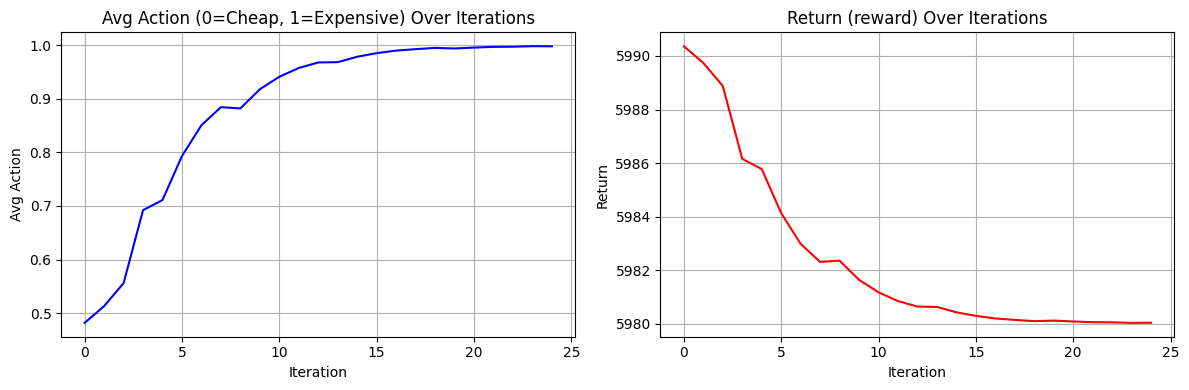

Graphing dd_Low_Cheap_Cost_a8_b6_k9_l1_n10_20250824_211152.csv...
Parsed params from filename: a=8.0, b=6.0, k=9.0, l=1.0, n=10
Individual utility: Expensive=7.1000, Cheap=5.9000 (Individually better: Expensive)
Per-person social gap (Expensive - Cheap): -6.0000 (Expensive payoff=-1.0000, Cheap payoff=5.0000, Socially better: Cheap)
Total social gap for n=10 (Expensive - Cheap): -60.0000 (Expensive total=-10.0000, Cheap total=50.0000, Socially better: Cheap)


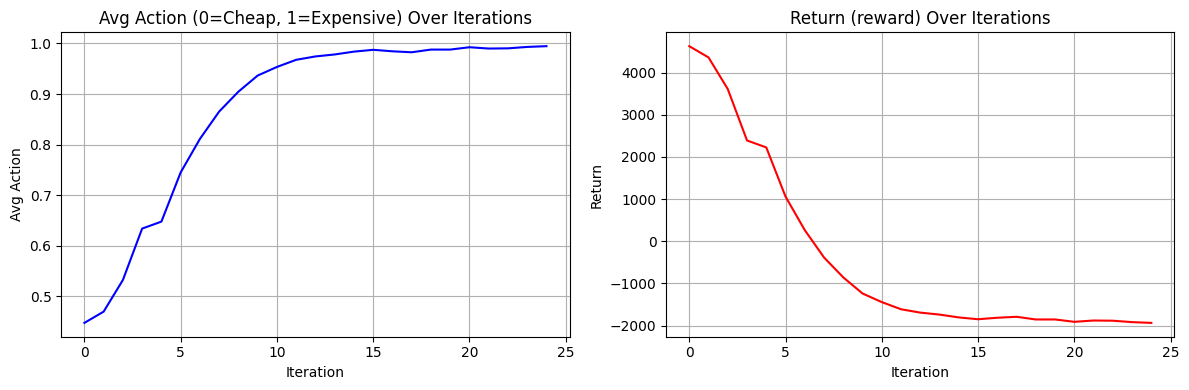

Graphing dd_Extreme_Dilemma_a10_b3_k25_l1_n10_20250824_212030.csv...
Parsed params from filename: a=10.0, b=3.0, k=25.0, l=1.0, n=10
Individual utility: Expensive=7.5000, Cheap=2.9000 (Individually better: Expensive)
Per-person social gap (Expensive - Cheap): -17.0000 (Expensive payoff=-15.0000, Cheap payoff=2.0000, Socially better: Cheap)
Total social gap for n=10 (Expensive - Cheap): -170.0000 (Expensive total=-150.0000, Cheap total=20.0000, Socially better: Cheap)


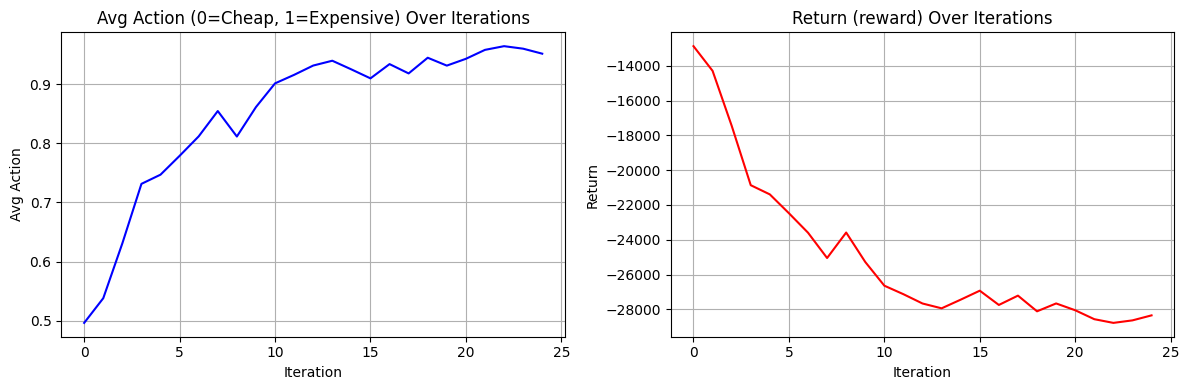

Graphing dd_Nearly_Boundary_Individual_a6.0_b4.0_k21.9_l2.0_n10_20250825_222739.csv...
Parsed params from filename: a=6.0, b=4.0, k=21.9, l=2.0, n=10
Individual utility: Expensive=3.8100, Cheap=3.8000 (Individually better: Expensive)
Per-person social gap (Expensive - Cheap): -17.9000 (Expensive payoff=-15.9000, Cheap payoff=2.0000, Socially better: Cheap)
Total social gap for n=10 (Expensive - Cheap): -179.0000 (Expensive total=-159.0000, Cheap total=20.0000, Socially better: Cheap)


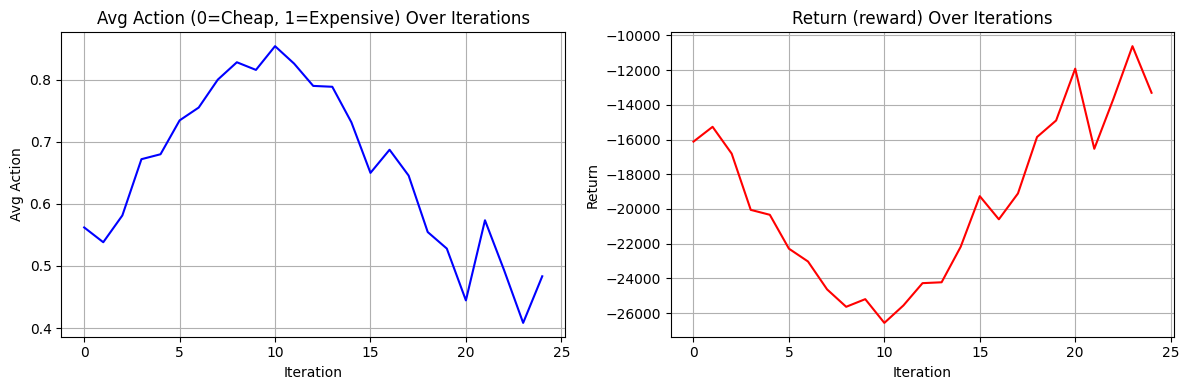

Graphing dd_Low_Rewards_Negative_Net_a3.0_b2.0_k7.0_l4.0_n10_20250825_223554.csv...
Parsed params from filename: a=3.0, b=2.0, k=7.0, l=4.0, n=10
Individual utility: Expensive=2.3000, Cheap=1.6000 (Individually better: Expensive)
Per-person social gap (Expensive - Cheap): -2.0000 (Expensive payoff=-4.0000, Cheap payoff=-2.0000, Socially better: Cheap)
Total social gap for n=10 (Expensive - Cheap): -20.0000 (Expensive total=-40.0000, Cheap total=-20.0000, Socially better: Cheap)


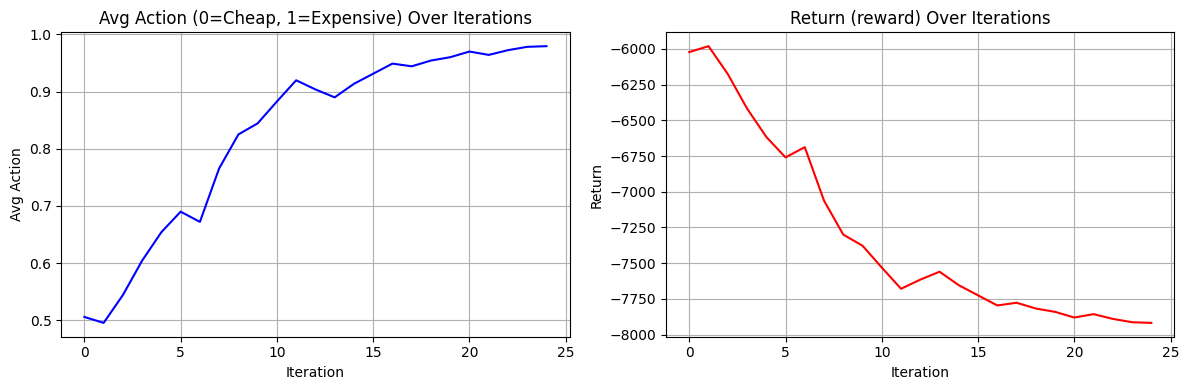

Graphing dd_Weak_Dilemma_a5_b4_k6_l2_n10_20250824_145440.csv...
Parsed params from filename: a=5.0, b=4.0, k=6.0, l=2.0, n=10
Individual utility: Expensive=4.4000, Cheap=3.8000 (Individually better: Expensive)
Per-person social gap (Expensive - Cheap): -3.0000 (Expensive payoff=-1.0000, Cheap payoff=2.0000, Socially better: Cheap)
Total social gap for n=10 (Expensive - Cheap): -30.0000 (Expensive total=-10.0000, Cheap total=20.0000, Socially better: Cheap)


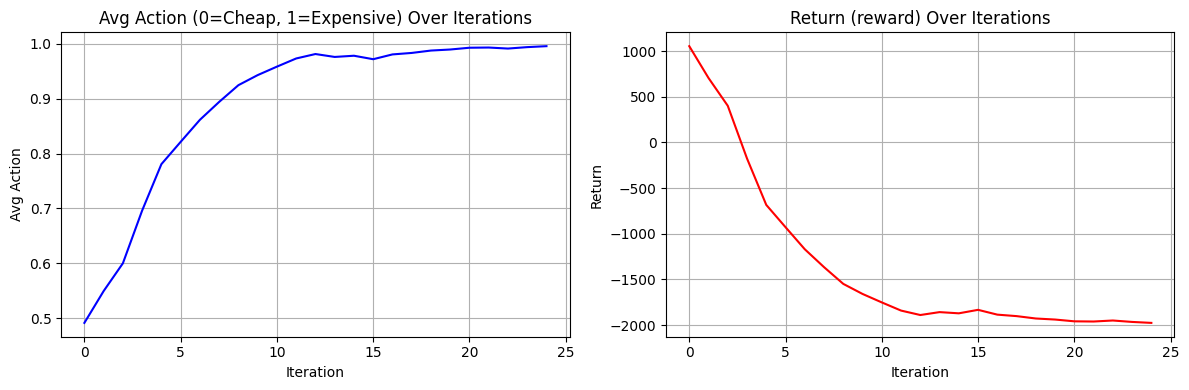

Graphing dd_Small_N_Sensitive_a6.0_b4.0_k9.0_l2.0_n10_20250825_223148.csv...
Parsed params from filename: a=6.0, b=4.0, k=9.0, l=2.0, n=10
Individual utility: Expensive=5.1000, Cheap=3.8000 (Individually better: Expensive)
Per-person social gap (Expensive - Cheap): -5.0000 (Expensive payoff=-3.0000, Cheap payoff=2.0000, Socially better: Cheap)
Total social gap for n=10 (Expensive - Cheap): -50.0000 (Expensive total=-30.0000, Cheap total=20.0000, Socially better: Cheap)


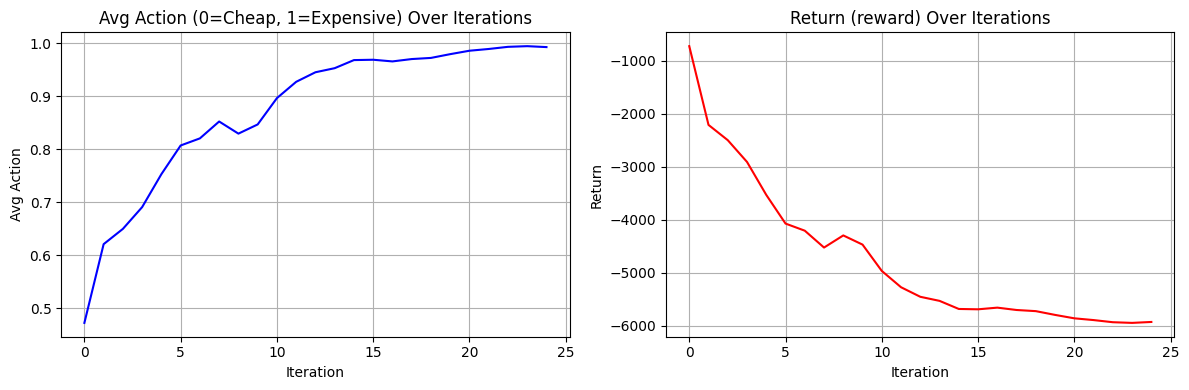

Graphing dd_Baseline_a6_b4_k7_l2_n10_20250824_144158.csv...
Parsed params from filename: a=6.0, b=4.0, k=7.0, l=2.0, n=10
Individual utility: Expensive=5.3000, Cheap=3.8000 (Individually better: Expensive)
Per-person social gap (Expensive - Cheap): -3.0000 (Expensive payoff=-1.0000, Cheap payoff=2.0000, Socially better: Cheap)
Total social gap for n=10 (Expensive - Cheap): -30.0000 (Expensive total=-10.0000, Cheap total=20.0000, Socially better: Cheap)


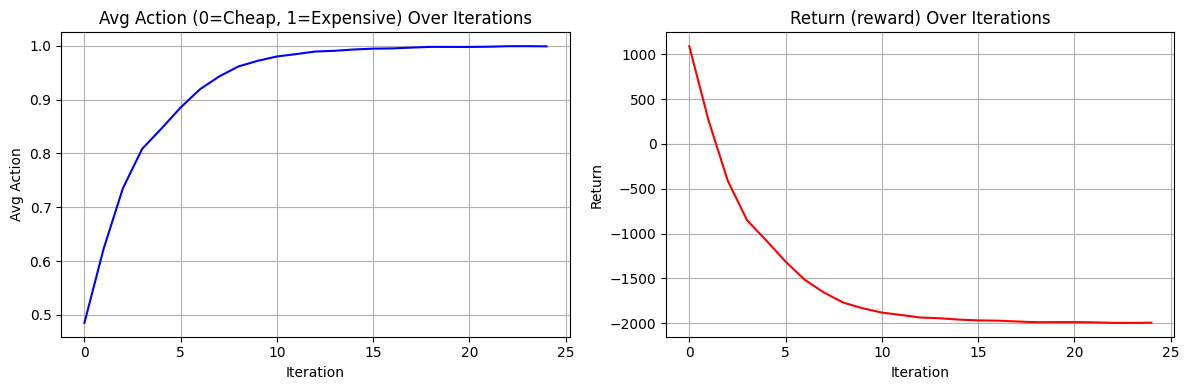

Graphing dd_High_Rewards_a12_b4_k15_l2_n10_20250824_210739.csv...
Parsed params from filename: a=12.0, b=4.0, k=15.0, l=2.0, n=10
Individual utility: Expensive=10.5000, Cheap=3.8000 (Individually better: Expensive)
Per-person social gap (Expensive - Cheap): -5.0000 (Expensive payoff=-3.0000, Cheap payoff=2.0000, Socially better: Cheap)
Total social gap for n=10 (Expensive - Cheap): -50.0000 (Expensive total=-30.0000, Cheap total=20.0000, Socially better: Cheap)


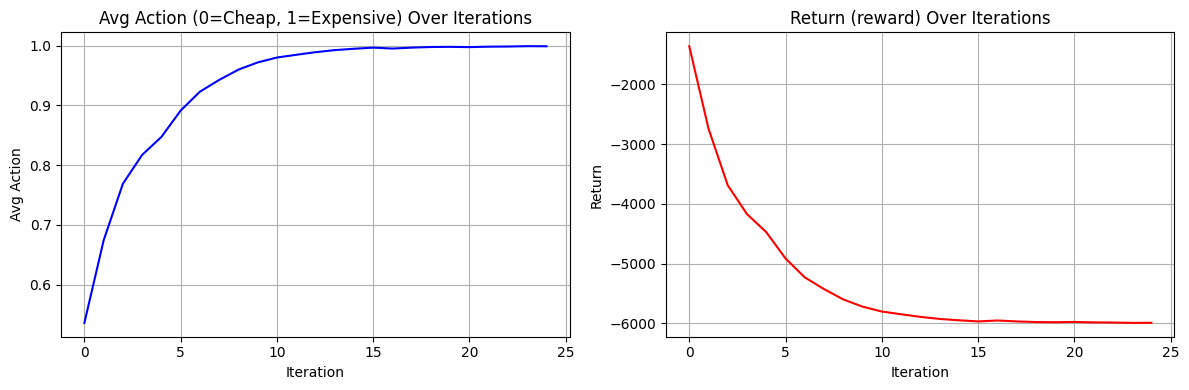

Graphing dd_Almost_Tie_Social_a5.0_b3.0_k8.01_l6.0_n10_20250825_224408.csv...
Parsed params from filename: a=5.0, b=3.0, k=8.01, l=6.0, n=10
Individual utility: Expensive=4.1990, Cheap=2.4000 (Individually better: Expensive)
Per-person social gap (Expensive - Cheap): -0.0100 (Expensive payoff=-3.0100, Cheap payoff=-3.0000, Socially better: Cheap)
Total social gap for n=10 (Expensive - Cheap): -0.1000 (Expensive total=-30.1000, Cheap total=-30.0000, Socially better: Cheap)


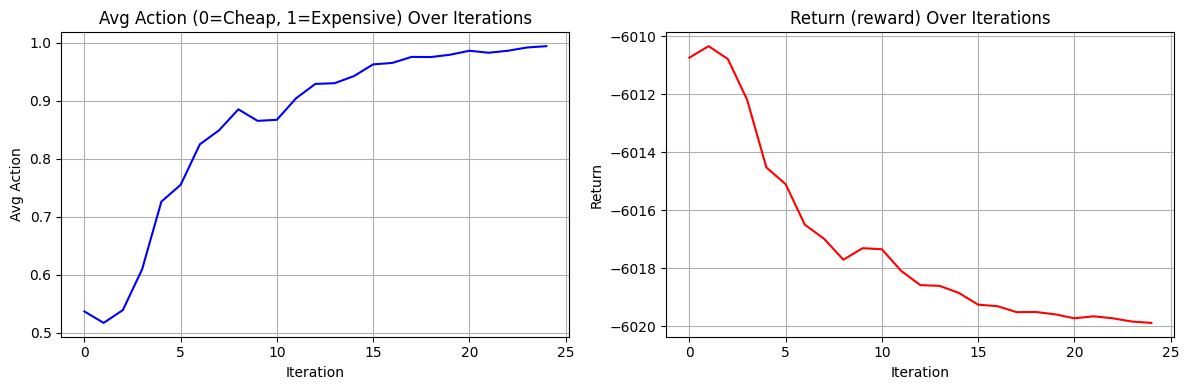

Graphing dd_High_Cheap_Reward_a9_b7_k10_l3_n10_20250824_211608.csv...
Parsed params from filename: a=9.0, b=7.0, k=10.0, l=3.0, n=10
Individual utility: Expensive=8.0000, Cheap=6.7000 (Individually better: Expensive)
Per-person social gap (Expensive - Cheap): -5.0000 (Expensive payoff=-1.0000, Cheap payoff=4.0000, Socially better: Cheap)
Total social gap for n=10 (Expensive - Cheap): -50.0000 (Expensive total=-10.0000, Cheap total=40.0000, Socially better: Cheap)


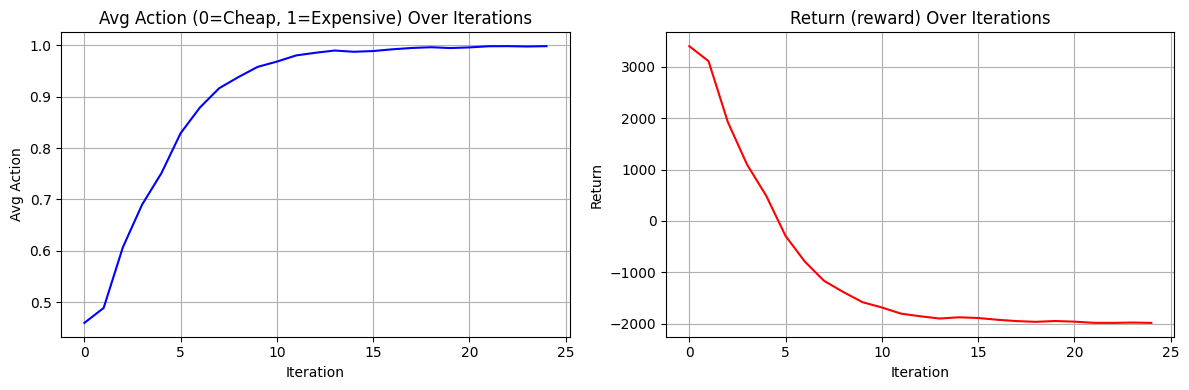

Graphing dd_Fractional_Small_Diff_a5.0_b4.6_k1.41_l1.0_n10_20250825_223956.csv...
Parsed params from filename: a=5.0, b=4.6, k=1.41, l=1.0, n=10
Individual utility: Expensive=4.8590, Cheap=4.5000 (Individually better: Expensive)
Per-person social gap (Expensive - Cheap): -0.0100 (Expensive payoff=3.5900, Cheap payoff=3.6000, Socially better: Cheap)
Total social gap for n=10 (Expensive - Cheap): -0.1000 (Expensive total=35.9000, Cheap total=36.0000, Socially better: Cheap)


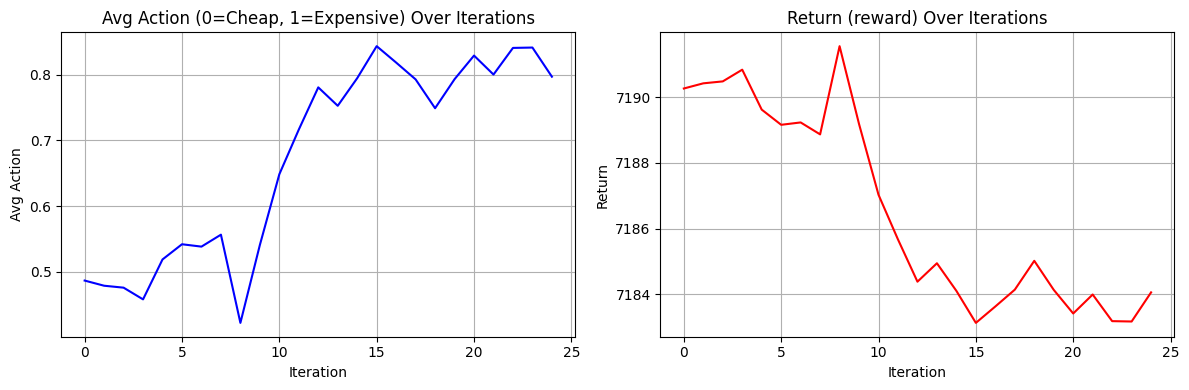

Graphing dd_Strong_Dilemma_a7_b4_k12_l2_n10_20250824_144837.csv...
Parsed params from filename: a=7.0, b=4.0, k=12.0, l=2.0, n=10
Individual utility: Expensive=5.8000, Cheap=3.8000 (Individually better: Expensive)
Per-person social gap (Expensive - Cheap): -7.0000 (Expensive payoff=-5.0000, Cheap payoff=2.0000, Socially better: Cheap)
Total social gap for n=10 (Expensive - Cheap): -70.0000 (Expensive total=-50.0000, Cheap total=20.0000, Socially better: Cheap)


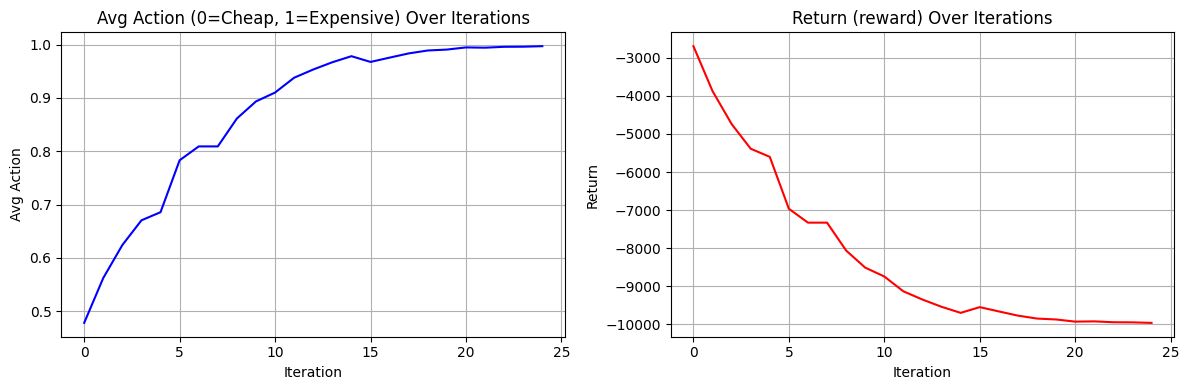

In [21]:
for file in os.listdir("data"):
    if file.startswith("dd") and file.endswith(".csv"):
        df = pd.read_csv(os.path.join("data", file))
        print(f"Graphing {file}...")
        analyze_from_filename(file)
        graph_df(simplify_df(df))